Эпоха 0, Потери: 0.039276666666656364
Эпоха 1, Потери: 0.0343049999999934
Эпоха 2, Потери: 0.03360999999999384
Эпоха 3, Потери: 0.03344666666666058
Эпоха 4, Потери: 0.03304499999999408
Эпоха 5, Потери: 0.032776666666660764
Эпоха 6, Потери: 0.032813333333327525
Эпоха 7, Потери: 0.03247166666666107
Эпоха 8, Потери: 0.032389999999994395
Эпоха 9, Потери: 0.03234666666666099
Эпоха 10, Потери: 0.032226666666661005
Эпоха 11, Потери: 0.03221499999999445
Эпоха 12, Потери: 0.03195666666666114
Эпоха 13, Потери: 0.03211333333332785
Эпоха 14, Потери: 0.03213333333332771
Эпоха 15, Потери: 0.0318866666666611
Эпоха 16, Потери: 0.03187666666666138
Эпоха 17, Потери: 0.03185499999999455
Эпоха 18, Потери: 0.03186999999999467
Эпоха 19, Потери: 0.03173666666666131
Точность на тестовых данных: 0.8059


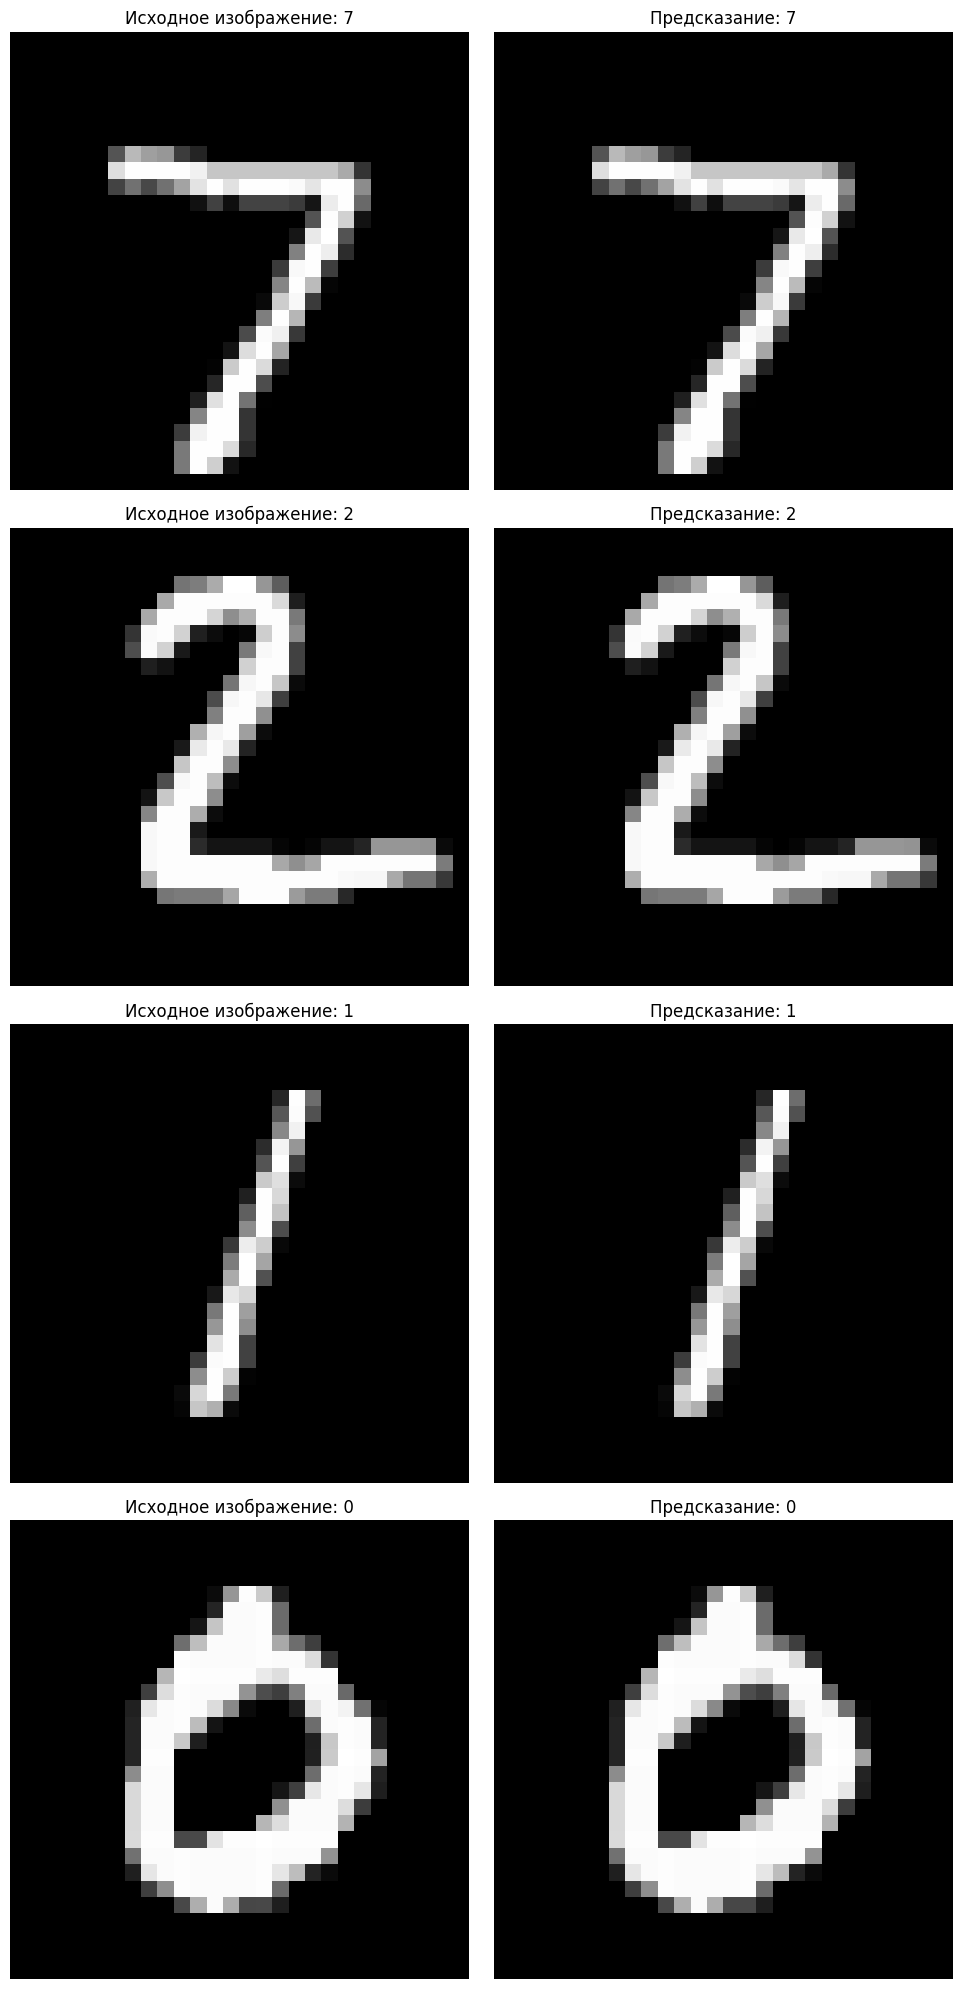

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Сигмоидальная функция активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    # Шаг 1: Инициализация весов и порога
    def __init__(self, input_size, num_classes):
        # Инициализация весов небольшими случайными значениями
        self.weights = np.random.randn(input_size, num_classes) * 0.01
        # Инициализация смещений небольшими случайными значениями (порог чувствительности)
        self.biases = np.random.randn(num_classes) * 0.01

    # Шаг 3: Применение сигмоидальной функции активации
    def activation_function(self, x):
        return sigmoid(x)

    # Прогнозирование выходных значений на основе входных данных
    def predict(self, x):
        # Вычисление линейной комбинации входов и весов с добавлением смещения
        z = np.dot(x, self.weights) + self.biases
        # Применение функции активации к линейной комбинации
        a = self.activation_function(z)
        # Возвращаем бинарный результат (True/False) на основе порога 0.5
        return a > 0.5

    # Обучение персептрона на обучающих данных
    def train(self, X, y, epochs, learning_rate):
        best_loss = float('inf')  # Инициализация наименьших потерь как бесконечность
        patience = 10  # Количество эпох без улучшения для ранней остановки
        patience_counter = 0  # Счетчик для отслеживания эпох без улучшения

        for epoch in range(epochs):
            total_loss = 0  # Суммарные потери за эпоху

            for i in range(len(X)):
                prediction = self.predict(X[i])  # Прогнозирование для текущего примера
                error = y[i] - prediction  # Вычисление ошибки

                # Обновление весов и смещений на основе ошибки и скорости обучения
                self.weights += learning_rate * np.dot(X[i][:, np.newaxis], error[np.newaxis, :])
                self.biases += learning_rate * error

                total_loss += np.mean(np.square(error))  # Обновление суммарных потерь

            average_loss = total_loss / len(X)  # Средние потери за эпоху
            print(f'Эпоха {epoch}, Потери: {average_loss}')

            # Ранняя остановка, если потери не уменьшаются
            if average_loss < best_loss:
                best_loss = average_loss  # Обновление наименьших потерь
                patience_counter = 0  # Сброс счетчика терпения
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print(f'Нет улучшений на протяжении {patience} эпох')
                    break

# Загрузка набора данных MNIST с использованием torchvision и преобразование изображений в тензоры
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
valset = datasets.MNIST('./data', download=True, train=False, transform=transform)

# Создание загрузчиков данных для обучающего и валидационного наборов данных
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = DataLoader(valset, batch_size=64, shuffle=False)

# Подготовка обучающих данных и меток для персептрона
train_data = []
train_labels = []

for images, labels in train_loader:
    train_data.append(images.numpy())  # Добавление изображений в список обучающих данных
    train_labels.append(labels.numpy())  # Добавление меток в список меток

train_data = np.concatenate(train_data)  # Конкатенация всех изображений в один массив
train_labels_encoded = LabelBinarizer().fit_transform(np.concatenate(train_labels))  # Кодирование меток

# Создание и обучение персептрона на MNIST данных (10 классов)
perceptron = Perceptron(train_data.shape[1], 10)
perceptron.train(train_data, train_labels_encoded, epochs=20, learning_rate=0.05)

# Тестирование персептрона на валидационном наборе данных MNIST
test_data = []
test_labels_encoded = []

for images, labels in val_loader:
    test_data.append(images.numpy())
    test_labels_encoded.append(labels.numpy())

test_data = np.concatenate(test_data)
test_labels_encoded = LabelBinarizer().fit_transform(np.concatenate(test_labels_encoded))

# Создание и обучение LabelBinarizer на обучающих метках для обратного преобразования предсказаний
label_binarizer = LabelBinarizer()
label_binarizer.fit(np.arange(10))

predictions = perceptron.predict(test_data)
predicted_labels = label_binarizer.inverse_transform(predictions)

# Вычисление точности предсказаний на тестовых данных
accuracy = accuracy_score(np.argmax(test_labels_encoded, axis=1), predicted_labels)
print(f'Точность на тестовых данных: {accuracy}')

# Визуализация результатов (можно изменить количество изображений для отображения)
def visualize_results(images, true_labels, predicted_labels, n=4):
    fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(10, 5 * n))

    for i in range(n):
        ax1, ax2 = axes[i]

        # Визуализация исходного изображения с истинной меткой
        ax1.imshow(images[i].reshape((28, 28)), cmap='gray')
        ax1.set_title(f'Исходное изображение: {true_labels[i]}')
        ax1.axis('off')

        # Визуализация предсказанного результата
        ax2.imshow(images[i].reshape((28, 28)), cmap='gray')
        ax2.set_title(f'Предсказание: {predicted_labels[i]}')
        ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Визуализация результатов на тестовых данных (можно изменить количество изображений для отображения)
visualize_results(test_data[:4], np.argmax(test_labels_encoded[:4], axis=1), predicted_labels[:4])